# Tsunami exercise
First we import what we need. I've also included the sleep up

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython import display 
from time import sleep

In [31]:
N = 200 #number of points in model domain
W = 100000 #total distance in metres
g = 9.82
x = np.linspace(0,W,N) #x-location of the grid nodes
dx = x[1]-x[0]

### Set up geometry and initial sea level pertubation... 
modify this to have more sensible sea bed, and initial sea surface pertubation.

The following equations are what defines the dynamics:
\begin{gathered}
\frac{\partial \eta}{\partial t}=-\nabla_x(u \cdot h) \\
\frac{\partial u}{\partial t}=-g \nabla_x \eta
\end{gathered}

They are implemented as follows:

In [32]:
def deta(_u, _h):
    h_half = (_h[1:] + _h[:-1])/2

    Q = _u*h_half
    
    return -np.diff(Q, prepend = 0, append = 0)/dx


def du(_eta):
    return -g*np.diff(_eta.copy())/dx





In [33]:
eta = np.exp(-((x-W/4)/10000)**2)/(np.sqrt(2*np.pi/2)*10)
sum(eta)

1.9896472612225637

# Run a number of timesteps of the model. 
... and visualize the results while running the model.

Here you need to fill in the missing lines of code. 

In [34]:
2000*dx

1005025.1256281408

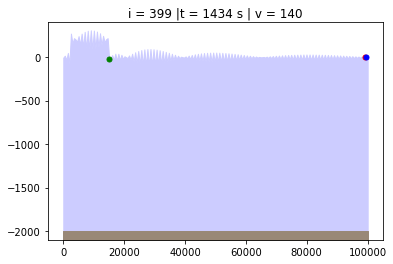

In [38]:
u = np.zeros((len(x)-1,))

# D = 1000*(np.cos(x*np.pi/W)+1) + 10

D = 2000

# make eta gauss
eta = np.exp(-((x-W/4)/5000)**2)#/(np.sqrt(2*np.pi/2)*10)


eta = np.zeros((len(x),))

eta[5:30] = 1

vertical_exageration = 200 
fig = plt.figure()
ylim = [-np.max(D)*1.05, np.max(np.abs(eta))*2*vertical_exageration]

last_peak = 0

front = 0
back = 0

t = 0


widths = []

crest_speeds = []

for i in range(400):
    h = eta+D
    

    dt = dx/np.sqrt(g*h.max()) 

    t += dt 
   
    u += dt*du(eta)

    eta += dt*deta(u, h)

    try:
        front_wave = (np.where(np.diff(np.sign(np.diff(eta))) < 0)[0] + 1)[-1]
    except:
        pass
    try:
        crest_speeds.append(np.mean([u[front_wave:front_wave+2]]))
    except:
        pass

    # find width of wave
    for ii in range(front_wave +1, len(eta)-1):
        if eta[ii] <= eta[ii + 1]+0.1:
            front = ii
            break
    for ii in range(front_wave -1, 0, -1):
        if eta[ii]+1 < eta[ii - 1]:
            back = ii
            break
    # front = front_wave
    # back = (np.where(np.diff(np.sign(np.diff(eta))) < 0)[0] + 1)[-3]

    plt.fill_between(x,eta*vertical_exageration,-D,color='#CCCCFF') #vertical exageration: x100.
    plt.fill_between(x,ylim[0],-D,color='#998877')

    plt.plot(x[front_wave], (eta*vertical_exageration)[front_wave], 'o', color='red', markersize=5)
    plt.plot(x[front], (eta*vertical_exageration)[front], 'o', color='blue', markersize=5)
    plt.plot(x[back], (eta*vertical_exageration)[back], 'o', color='green', markersize=5)
    
    width = x[front] - x[back]
    widths.append(width)
    plt.title(f"i = {i} |t = {t:0.0f} s | v = {140:.0f}") #check if mass conserved.
    last_peak = x[front_wave]
    plt.axis('tight')
    plt.ylim(ylim)

    #old-school way to make an animation that is updating as it is being calculated
    plt.show()


    # plot fourier transform of eta
    
    sleep(1/100)
    display.clear_output(wait=True)

    # print(front_wave, front, len(eta) - front_wave - 1)


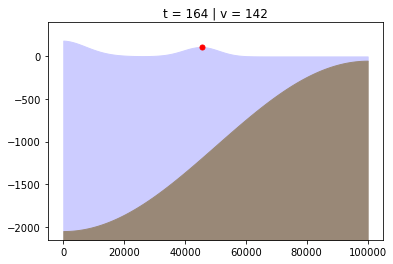

Text(0.5, 0, 'Timesteps')

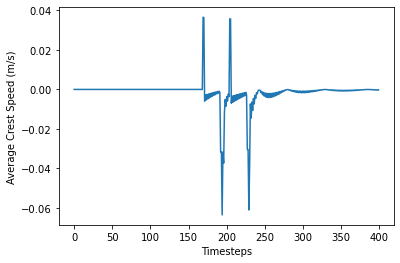

In [39]:
plt.plot(crest_speeds)
plt.ylabel("Average Crest Speed (m/s)")
plt.xlabel("Timesteps")

Text(0.5, 0, 'Timesteps')

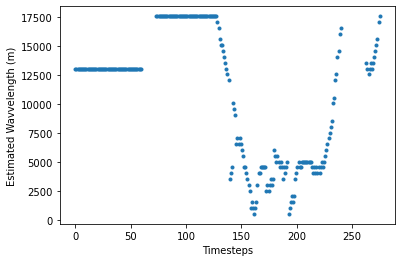

In [40]:
pw = np.array(widths[40:])
plotx = np.linspace(0, len(pw), len(pw))
plt.plot(plotx[pw<18000],pw[pw<18000],'.')
plt.ylabel("Estimated Wavvelength (m)")
plt.xlabel("Timesteps")
# plt.plot(plotx,(np.cos(plotx/len(pw)*np.pi) +1)*max(pw)/2)